# Sentiment Analysis on Tweets


**Import All Required Packages**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
from string import punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kftsu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
pip install pymongo

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pymongo

myclient = pymongo.MongoClient("mongodb://localhost:27017/")

mydb = myclient["CA2"]
mycol = mydb["Tweets"]

In [4]:
dblist = myclient.list_database_names()
if "CA2" in dblist:
  print("The database exists.")

The database exists.


In [5]:
collist = mydb.list_collection_names()
if "Tweets" in collist:
  print("The collection exists.")

The collection exists.


**Read data from csv**

In [6]:
df = pd.read_csv("TweetsFarmers.csv")
df.head()

,Date,ID,Tweet
0,23/03/2020 02:30,1.380000e+18,Support \ud83d\udc47\n\n#FarmersProtest
1,24/03/2020 02:31,1.380000e+18,Supporting farmers means supporting our countr...
2,25/03/2020 02:31,1.380000e+18,Support farmers if you are related to food #St...
3,26/03/2020 02:32,1.380000e+18,#StopHateAgainstFarmers support #FarmersProtes...
4,27/03/2020 02:32,1.380000e+18,"You hate farmers I hate you, \nif you love th..."


**Drop unnecessary columns**

In [7]:
#df = df.drop(['Serial', 'Unnamed: 4', ], axis=1)
#df.dropna(inplace=True)

In [8]:
df.head()

,Date,ID,Tweet
0,23/03/2020 02:30,1.380000e+18,Support \ud83d\udc47\n\n#FarmersProtest
1,24/03/2020 02:31,1.380000e+18,Supporting farmers means supporting our countr...
2,25/03/2020 02:31,1.380000e+18,Support farmers if you are related to food #St...
3,26/03/2020 02:32,1.380000e+18,#StopHateAgainstFarmers support #FarmersProtes...
4,27/03/2020 02:32,1.380000e+18,"You hate farmers I hate you, \nif you love th..."


In [9]:
df['word_count'] = df['Tweet'].apply(lambda x: len(str(x).split(" ")))

In [10]:
# adding a column for the number of words of the review
df[['Tweet','word_count']].head()

,Tweet,word_count
0,Support \ud83d\udc47\n\n#FarmersProtest,3
1,Supporting farmers means supporting our countr...,10
2,Support farmers if you are related to food #St...,12
3,#StopHateAgainstFarmers support #FarmersProtes...,12
4,"You hate farmers I hate you, \nif you love th...",17


In [11]:
df['char_count'] = df['Tweet'].str.len() 

In [12]:
# Adding a column for the number of characters of the review. This also includes spaces

df[['Tweet','char_count']].head()

,Tweet,char_count
0,Support \ud83d\udc47\n\n#FarmersProtest,40
1,Supporting farmers means supporting our countr...,112
2,Support farmers if you are related to food #St...,107
3,#StopHateAgainstFarmers support #FarmersProtes...,104
4,"You hate farmers I hate you, \nif you love th...",109


In [13]:
df.head()

,Date,ID,Tweet,word_count,char_count
0,23/03/2020 02:30,1.380000e+18,Support \ud83d\udc47\n\n#FarmersProtest,3,40
1,24/03/2020 02:31,1.380000e+18,Supporting farmers means supporting our countr...,10,112
2,25/03/2020 02:31,1.380000e+18,Support farmers if you are related to food #St...,12,107
3,26/03/2020 02:32,1.380000e+18,#StopHateAgainstFarmers support #FarmersProtes...,12,104
4,27/03/2020 02:32,1.380000e+18,"You hate farmers I hate you, \nif you love th...",17,109


#### Natural Language Processing

In [14]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kftsu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<font color = red> *This means there are stopwords in the reviews.
I wanted to look at the stopwords.

In [15]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [16]:
#Counting the number of stop words

df['stopwords'] = df['Tweet'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['Tweet','stopwords']].head()

,Tweet,stopwords
0,Support \ud83d\udc47\n\n#FarmersProtest,0
1,Supporting farmers means supporting our countr...,1
2,Support farmers if you are related to food #St...,4
3,#StopHateAgainstFarmers support #FarmersProtes...,2
4,"You hate farmers I hate you, \nif you love th...",2


In [17]:
#Counting number of hashtags present in the review

df['hastags'] = df['Tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
df[['Tweet','hastags']].head()

,Tweet,hastags
0,Support \ud83d\udc47\n\n#FarmersProtest,0
1,Supporting farmers means supporting our countr...,2
2,Support farmers if you are related to food #St...,2
3,#StopHateAgainstFarmers support #FarmersProtes...,2
4,"You hate farmers I hate you, \nif you love th...",0


In [18]:
# Counting the numerics in the review

df['numerics'] = df['Tweet'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df[['Tweet','numerics']].head()

,Tweet,numerics
0,Support \ud83d\udc47\n\n#FarmersProtest,0
1,Supporting farmers means supporting our countr...,0
2,Support farmers if you are related to food #St...,0
3,#StopHateAgainstFarmers support #FarmersProtes...,0
4,"You hate farmers I hate you, \nif you love th...",0


In [19]:
# number of uppercases present in reviews

df['upper'] = df['Tweet'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df[['Tweet','upper']].head()

,Tweet,upper
0,Support \ud83d\udc47\n\n#FarmersProtest,0
1,Supporting farmers means supporting our countr...,0
2,Support farmers if you are related to food #St...,0
3,#StopHateAgainstFarmers support #FarmersProtes...,0
4,"You hate farmers I hate you, \nif you love th...",2


I wanted to transform uppercases to lowercase to avoid having multiple copies of the same words.

In [20]:
#transforming uppercases to lowercase

df['Tweet'] = df['Tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Tweet'].head()

0              support \ud83d\udc47\n\n#farmersprotest
1    supporting farmers means supporting our countr...
2    support farmers if you are related to food #st...
3    #stophateagainstfarmers support #farmersprotes...
4    you hate farmers i hate you, \nif you love the...
Name: Tweet, dtype: object

I wanted to remove special characters in the reviews.

In [21]:
#removing special characters

df['Tweet'] = df['Tweet'].str.replace('[^\w\s\_\!]','')
df['Tweet'].head()

C:\Users\kftsu\AppData\Local\Temp\ipykernel_15104\1614436818.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Tweet'] = df['Tweet'].str.replace('[^\w\s\_\!]','')


0                   support ud83dudc47nnfarmersprotest
1    supporting farmers means supporting our countr...
2    support farmers if you are related to food sto...
3    stophateagainstfarmers support farmersprotest ...
4    you hate farmers i hate you nif you love them ...
Name: Tweet, dtype: object

I wanted to make a list of stopwords so I can remove them.

In [22]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['Tweet'] = df['Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['Tweet'].head()

0                   support ud83dudc47nnfarmersprotest
1    supporting farmers means supporting country st...
2    support farmers related food stophateagainstfa...
3    stophateagainstfarmers support farmersprotest ...
4    hate farmers hate nif love love you! nnstophat...
Name: Tweet, dtype: object

I wanted to remove the common words

In [23]:
#count of common words
freq = pd.Series(' '.join(df['Tweet']).split()).value_counts()[:10]
freq

farmersprotest                                       349
farmers                                              331
farmer                                               276
amp                                                  183
stophateagainstfarmers                               161
bjp                                                  108
nnfarmersprotest                                      92
nfarmersprotest                                       89
u0939u0930_u0915u093fu0938u093eu0928_bhagat_singh     78
together                                              74
dtype: int64

In [24]:
#Removing the most common words

freq = list(freq.index)
df['Tweet'] = df['Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['Tweet'].head()

0                   support ud83dudc47nnfarmersprotest
1    supporting means supporting country httpstcoiw...
2              support related food httpstcotcozx4zmyu
3       support pressurising got accept genuine demand
4    hate hate nif love love you! nnstophateagainst...
Name: Tweet, dtype: object

We can see that the common words are removed as their presence will not of any use in classification of my text data.

Next, I wanted to remove the rare words. This is because the association between these rare words and other words is dominated by noise.

In [25]:
freq = pd.Series(' '.join(df['Tweet']).split()).value_counts()[-10:]
freq

guilty                1
silent                1
remain                1
relationship          1
developed             1
maharaj               1
gobind                1
rider!                1
depicts               1
httpstcoohx2pow0gq    1
dtype: int64

In [26]:
#Removing the most rare words

freq = list(freq.index)
df['Tweet'] = df['Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['Tweet'].head()

0                   support ud83dudc47nnfarmersprotest
1    supporting means supporting country httpstcoiw...
2              support related food httpstcotcozx4zmyu
3       support pressurising got accept genuine demand
4    hate hate nif love love you! nnstophateagainst...
Name: Tweet, dtype: object

I wanted to correct spelling of the reviews.

In [27]:
#correcting spelling

from textblob import TextBlob
df['Tweet'][:5].apply(lambda x: str(TextBlob(x).correct()))


0                   support ud83dudc47nnfarmersprotest
1    supporting means supporting country httpstcoiw...
2              support related food httpstcotcozx4zmyu
3       support pressurising got accept genuine demand
4    hate hate if love love you! nnstophateagainstf...
Name: Tweet, dtype: object

#### Tokenization

-dividing the text into a sequence of words or sentences.

In [28]:
nltk.download('punkt')
TextBlob(df['Tweet'][1]).words

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kftsu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


WordList(['supporting', 'means', 'supporting', 'country', 'httpstcoiwpattk6nv'])

##### Stemming

-removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach. For this purpose, I will use PorterStemmer from the NLTK library. 

In [29]:
#Stemming

from nltk.stem import PorterStemmer
st = PorterStemmer()
df['Tweet'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0                   support ud83dudc47nnfarmersprotest
1      support mean support countri httpstcoiwpattk6nv
2                support relat food httpstcotcozx4zmyu
3           support pressuris got accept genuin demand
4    hate hate nif love love you! nnstophateagainst...
Name: Tweet, dtype: object

##### Lemmatization

-converts the word into its root word, rather than just stripping the suffices. It makes use of the vocabulary and does a morphological analysis to obtain the root word

In [30]:
# Lemmatization

nltk.download('wordnet')
from textblob import Word
df['Tweet'] = df['Tweet'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['Tweet'].head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kftsu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0                   support ud83dudc47nnfarmersprotest
1    supporting mean supporting country httpstcoiwp...
2              support related food httpstcotcozx4zmyu
3       support pressurising got accept genuine demand
4    hate hate nif love love you! nnstophateagainst...
Name: Tweet, dtype: object

I wanted to extract bigrams from the reviews using the ngrams function of the textblob. I wanted to capture the language structure, like what letter or word is likely to follow the given one. I wanted to work with bigrams to capture general knowlege.

In [31]:
TextBlob(df['Tweet'][0]).ngrams(2)

[WordList(['support', 'ud83dudc47nnfarmersprotest'])]

#### Term frequency

-the ratio of the count of a word present in a sentence, to the length of the sentence.

In [32]:
#term frequency

tf1 = (df['Tweet'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,supporting,2
1,mean,1
2,country,1
3,httpstcoiwpattk6nv,1


#### Sentiment Analysis

In [33]:
df['Tweet'][:5].apply(lambda x: TextBlob(x).sentiment)

0                      (0.0, 0.0)
1    (0.0625, 0.3958333333333333)
2                      (0.0, 0.4)
3                      (0.4, 0.5)
4    (-0.11875000000000002, 0.75)
Name: Tweet, dtype: object

In [34]:
df['sentiment'] = df['Tweet'].apply(lambda x: TextBlob(x).sentiment[0] )
df[['Tweet','sentiment']].head()

,Tweet,sentiment
0,support ud83dudc47nnfarmersprotest,0.00000
1,supporting mean supporting country httpstcoiwp...,0.06250
2,support related food httpstcotcozx4zmyu,0.00000
3,support pressurising got accept genuine demand,0.40000
4,hate hate nif love love you! nnstophateagainst...,-0.11875


In [35]:
df.head(5)

,Date,ID,Tweet,word_count,char_count,stopwords,hastags,numerics,upper,sentiment
0,23/03/2020 02:30,1.380000e+18,support ud83dudc47nnfarmersprotest,3,40,0,0,0,0,0.00000
1,24/03/2020 02:31,1.380000e+18,supporting mean supporting country httpstcoiwp...,10,112,1,2,0,0,0.06250
2,25/03/2020 02:31,1.380000e+18,support related food httpstcotcozx4zmyu,12,107,4,2,0,0,0.00000
3,26/03/2020 02:32,1.380000e+18,support pressurising got accept genuine demand,12,104,2,2,0,0,0.40000
4,27/03/2020 02:32,1.380000e+18,hate hate nif love love you! nnstophateagainst...,17,109,2,0,0,2,-0.11875


**Calculation of Polarity**

In [36]:
#adding polarity rating

df['Polarity_Rating'] = df['sentiment'].apply(lambda x: 'Positive' if x > 0 else('Neutral' if x == 0 else 'Negative'))

In [37]:
df.head()

,Date,ID,Tweet,word_count,char_count,stopwords,hastags,numerics,upper,sentiment,Polarity_Rating
0,23/03/2020 02:30,1.380000e+18,support ud83dudc47nnfarmersprotest,3,40,0,0,0,0,0.00000,Neutral
1,24/03/2020 02:31,1.380000e+18,supporting mean supporting country httpstcoiwp...,10,112,1,2,0,0,0.06250,Positive
2,25/03/2020 02:31,1.380000e+18,support related food httpstcotcozx4zmyu,12,107,4,2,0,0,0.00000,Neutral
3,26/03/2020 02:32,1.380000e+18,support pressurising got accept genuine demand,12,104,2,2,0,0,0.40000,Positive
4,27/03/2020 02:32,1.380000e+18,hate hate nif love love you! nnstophateagainst...,17,109,2,0,0,2,-0.11875,Negative


In [38]:
df.to_csv('FarmersSentimentsdataset.csv')

**Plot the Rating visualization graph**

<AxesSubplot:xlabel='sentiment', ylabel='count'>

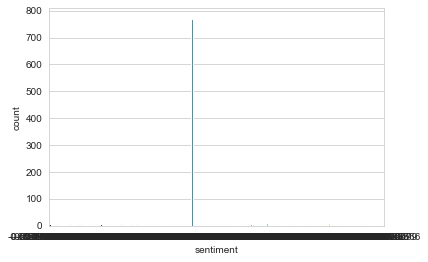

In [39]:
sns.set_style('whitegrid')
sns.countplot(x='sentiment',data=df, palette='YlGnBu_r')

**Plot the Polarity Rating count**

<AxesSubplot:xlabel='Polarity_Rating', ylabel='count'>

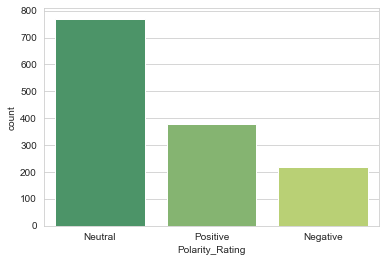

In [40]:
sns.set_style('whitegrid')
sns.countplot(x='Polarity_Rating',data=df, palette='summer')

**Data Preprocessing**

In [41]:
df_Positive = df[df['Polarity_Rating'] == 'Positive'][0:8000]
df_Neutral = df[df['Polarity_Rating'] == 'Neutral']
df_Negative = df[df['Polarity_Rating'] == 'Negative']

**Sample negative and neutral polarity dataset and create final dataframe**

In [42]:
df_Neutral_over = df_Neutral.sample(800, replace=True)
df_Negative_over = df_Negative.sample(800, replace=True)
df = pd.concat([df_Positive, df_Neutral_over, df_Negative_over], axis=0)

**Text Preprocessing**

In [43]:
def get_text_processing(text):
    stpword = stopwords.words('english')
    no_punctuation = [char for char in text if char not in string.punctuation]
    no_punctuation = ''.join(no_punctuation)
    return ' '.join([word for word in no_punctuation.split() if word.lower() not in stpword])

**Apply the method "get_text_processing" into column review text**

In [44]:
df['Tweettext'] = df['Tweet'].apply(get_text_processing)
df.head()

,Date,ID,Tweet,word_count,char_count,stopwords,hastags,numerics,upper,sentiment,Polarity_Rating,Tweettext
1,24/03/2020 02:31,1.380000e+18,supporting mean supporting country httpstcoiwp...,10,112,1,2,0,0,0.0625,Positive,supporting mean supporting country httpstcoiwp...
3,26/03/2020 02:32,1.380000e+18,support pressurising got accept genuine demand,12,104,2,2,0,0,0.4000,Positive,support pressurising got accept genuine demand
5,28/03/2020 02:32,1.380000e+18,cant look like gundas good time seem violence ...,21,143,5,1,0,0,0.7000,Positive,cant look like gundas good time seem violence ...
7,30/03/2020 02:33,1.380000e+18,troll48611422 doabapunjab1 terminator00096 har...,52,417,16,1,0,0,0.9000,Positive,troll48611422 doabapunjab1 terminator00096 har...
8,31/03/2020 02:33,1.380000e+18,neutrality help oppressor never victim nnsilen...,20,164,6,0,0,0,0.0375,Positive,neutrality help oppressor never victim nnsilen...


**Visualize Text Review with Polarity Rating**

In [45]:
df = df[['Tweet', 'Polarity_Rating']]
df.head()

,Tweet,Polarity_Rating
1,supporting mean supporting country httpstcoiwp...,Positive
3,support pressurising got accept genuine demand,Positive
5,cant look like gundas good time seem violence ...,Positive
7,troll48611422 doabapunjab1 terminator00096 har...,Positive
8,neutrality help oppressor never victim nnsilen...,Positive


In [46]:
df.shape

(1977, 2)

**Apply One hot encoding on negative, neutral, and positive**

In [47]:
one_hot = pd.get_dummies(df["Polarity_Rating"])
df.drop(['Polarity_Rating'],axis=1,inplace=True)
df = pd.concat([df,one_hot],axis=1)
df.head()

,Tweet,Negative,Neutral,Positive
1,supporting mean supporting country httpstcoiwp...,0,0,1
3,support pressurising got accept genuine demand,0,0,1
5,cant look like gundas good time seem violence ...,0,0,1
7,troll48611422 doabapunjab1 terminator00096 har...,0,0,1
8,neutrality help oppressor never victim nnsilen...,0,0,1


**Apply Train Test Split**

In [48]:
X = df['Tweet'].values
y = df.drop('Tweet', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

**Apply vectorization**

In [49]:
vect = CountVectorizer()
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)

**Apply frequency, inverse document frequency:**

In [50]:
tfidf = TfidfTransformer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)
X_train = X_train.toarray()
X_test = X_test.toarray()

**Add different layers**

In [51]:
model = Sequential()

model.add(Dense(units=12673,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=4000,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=500,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=3, activation='softmax'))

opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

In [52]:
!echo 1 > /proc/sys/vm/overcommit_memory

The system cannot find the path specified.


**Fit the Model**

In [53]:
model.fit(x=X_train, y=y_train, batch_size=256, epochs=100, validation_data=(X_test, y_test), verbose=1, callbacks=early_stop)

Epoch 1/100
6/6 [==============================] - 15s 2s/step - loss: 0.9956 - accuracy: 0.5278 - val_loss: 0.6852 - val_accuracy: 0.7290
Epoch 2/100
6/6 [==============================] - 9s 1s/step - loss: 0.4219 - accuracy: 0.8055 - val_loss: 0.3563 - val_accuracy: 0.8502
Epoch 3/100
6/6 [==============================] - 8s 1s/step - loss: 0.1021 - accuracy: 0.9826 - val_loss: 0.5001 - val_accuracy: 0.8401
Epoch 4/100
6/6 [==============================] - 9s 2s/step - loss: 0.0137 - accuracy: 0.9971 - val_loss: 0.7595 - val_accuracy: 0.8552
Epoch 4: early stopping


**Evaluation of Model**

In [54]:
model_score = model.evaluate(X_test, y_test, batch_size=2, verbose=1)
print('Test accuracy:', model_score[1])

297/297 [==============================] - 10s 33ms/step - loss: 0.7595 - accuracy: 0.8552
Test accuracy: 0.8552188277244568


In [55]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1977 entries, 1 to 1236
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Tweet     1977 non-null   object
 1   Negative  1977 non-null   uint8 
 2   Neutral   1977 non-null   uint8 
 3   Positive  1977 non-null   uint8 
dtypes: object(1), uint8(3)
memory usage: 386.7 KB


**Prediction**

In [56]:
preds = model.predict(X_test)
preds

19/19 [==============================] - 2s 102ms/step


array([[1.00000000e+00, 2.90081942e-18, 1.94853875e-08],
       [9.99999881e-01, 3.84569237e-16, 1.04290436e-07],
       [1.04863229e-05, 4.30287458e-02, 9.56960738e-01],
       ...,
       [9.99999881e-01, 2.55887303e-16, 1.59724010e-07],
       [1.61217724e-21, 1.00000000e+00, 6.10841724e-11],
       [3.61876951e-13, 9.99992609e-01, 7.41790564e-06]], dtype=float32)

In [57]:
preds.shape

(594, 3)